# Implementação

## Grupo: 

Samara

Giovana

Daniel

<hr>

A DURAÇO fabrica chapas retangulares de aços variados, com comprimento $L$ e largura $W$, que depois corta em retângulos menores, de comprimento $l_i$ e largura $w_i$, para satisfazer às encomendas de clientes. A saída da laminagem um engenheiro consulta as encomendas pendentes no sistema e decide quais retângulos serão cortados naquela chapa, isso é, é definido o padrão de corte para aquela chapa. 

Cada retângulo encomendado tem um valor de venda $v_i$ e o objetivo é maximizar o valor extraído de cada chapa, ou seja, o valor dos retângulos cortados a partir da chapa. 

Devido às características do aço variarem com a dirção, os retângulos não podem ser rotacionados e têm de ser cortados segundo a orientação com que foram encomendados, isto é, a dimensão $l_i$ ao longo de $L$ e a dimensão $w_i$ ao longo de $W$. 

Assuma que o comprimento da chapa é sempre maior ou igual à largura da chapa, ou seja, $L \geq W$.

<hr>

Considere o seguinte modelo de programação linear mista para este problema:

Dados:

$L$ – Comprimento da chapa.

$W$ – Largura da chapa.

$m$ – Número de retângulos encomendados.

$l_i$ – Comprimento do retângulo $i$ ($i \in \{1, \dots, m\}$).

$w_i$ – Largura do retângulo $i$ ($i \in \{1, \dots, m\}$).

$v_i$ – Valor do retângulo $i$ ($i \in \{1, \dots, m\}$).

<hr>

## Variáveis de decisão:

$ \delta_i \in \{0, 1\}$ – O retângulo $i$ ($i \in \{1, \dots, m$}) é selecionado, ou não, para fazer parte do padrão de corte.

$x_i \geq 0$ – Coordenada $x$ de posicionamento do canto inferior esquerdo do retângulo $i$.

$y_i \geq 0$ – Coordenada $y$ de posicionamento do canto inferior esquerdo do retângulo $i$.


Nota: Considere que a origem do sistema de eixos das coordenadas está no canto inferior esquerdo da chapa. Por exemplo, no exemplo apresentado no enunciado, o retângulo de dimensões (0, 65×1, 90) está posicionado nas coordenadas x = 2, 00 ; y = 0, 00.


## Variáveis auxiliares:

$\gamma_{ijk} \in \{0, 1\}$ – $i \in \{1, \dots, m\}$, $j \in \{1, \dots, m\}$ ∧ $j\neq i$, $k \in \{1, \dots, 4\}$

<hr>

## Função objetivo

\begin{equation*}
    \text{Máx }\sum_{i=1}^m v_i\delta_i
\end{equation*}

Sujeito a:

\begin{equation*}
    x_i-x_j+l_i\leq (1-\gamma_{ij1})M \;\;\;\;\;\;\;\;\;\;\;\;\text{ (2)}
\end{equation*}

\begin{equation*}
    -x_i+x_j+l_j\leq (1-\gamma_{ij2})M \;\;\;\;\;\;\;\;\;\;\;\;\text{ (3)}
\end{equation*}

\begin{equation*}
    y_i-y_j+w_i\leq (1-\gamma_{ij3})M \;\;\;\;\;\;\;\;\;\;\;\;\text{ (4)}
\end{equation*}

\begin{equation*}
    -y_i-y_j+w_j\leq (1-\gamma_{ij4})M \;\;\;\;\;\;\;\;\;\;\;\;\text{ (5)}
\end{equation*}

\begin{equation*}
    \sum_{k=1}^4\gamma_{ijk}\geq \delta_i + \delta_j -1 \;\;\;\;\;\;\;\;\;\;\;\;\text{ (2)}
\end{equation*}

\begin{equation*}
    x_i\leq L-l_i\;\;\;\;\;\;\;\;\;\;\;\;\text{ (7)}
\end{equation*}

\begin{equation*}
    y_i\leq W-w_i \;\;\;\;\;\;\;\;\;\;\;\;\text{ (8)}
\end{equation*}

\begin{equation*}
    x_i,y_i\geq 0\;\;\;\;\;\;\;\;\;\;\;\;\text{ (9)}
\end{equation*}

\begin{equation*}
    \delta_i\in\{0,1\}\;\;\;\;\;\;\;\;\;\;\;\;\text{ (10)}
\end{equation*}

\begin{equation*}
    \gamma_{ijk}\in\{0,1\}\;\;\;\;\;\;\;\;\;\;\;\;\text{ (11)}
\end{equation*}

\begin{equation*}
    M \rightarrow \infty \;\;\;\;\;\;\;\;\;\;\;\;\text{ (12)}
\end{equation*}

<hr>

### Exemplo concreto:

<img title="" src="https://raw.githubusercontent.com/Daniel-C-Fernandes/PO/main/chapas.png" alt="transporte" style="zoom:20%">

<hr>

Modelo computacional:

In [1000]:
# Dados:

# M grande
M = 100

# Chapa padrão
L = 4
W = 4

# Cortes: l_i, w_i, v_i
C = [
    3 2 4;
    2 3 5;
    4 1 6;
    2 2 3
]

4×3 Matrix{Int64}:
 3  2  4
 2  3  5
 4  1  6
 2  2  3

In [1001]:
using HiGHS, JuMP, PrettyTables, Plots
model = Model(HiGHS.Optimizer)

# Coordenadas x e y
@variable(model, x[i=1:4] >= 0)
@variable(model, y[i=1:4] >= 0)
@variable(model, δ[i=1:4], Bin)

# Variáveis auxiliares
@variable(model, γ[i=1:4,j=1:4,k=1:4], Bin)

# Função objective
@objective(model, Max, C[:,3]'δ)

4 δ[1] + 5 δ[2] + 6 δ[3] + 3 δ[4]

In [1002]:
# Restrição (2)
@constraint(model, restr2[i=1:4,j=1:4;i!=j], x[i]-x[j]+C[i,1]<=(1-γ[i,j,1])*M)

JuMP.Containers.SparseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}, 2, Tuple{Int64, Int64}} with 12 entries:
  [1, 2]  =  restr2[1,2] : x[1] - x[2] + 100 γ[1,2,1] ≤ 97
  [1, 3]  =  restr2[1,3] : x[1] - x[3] + 100 γ[1,3,1] ≤ 97
  [1, 4]  =  restr2[1,4] : x[1] - x[4] + 100 γ[1,4,1] ≤ 97
  [2, 1]  =  restr2[2,1] : -x[1] + x[2] + 100 γ[2,1,1] ≤ 98
  [2, 3]  =  restr2[2,3] : x[2] - x[3] + 100 γ[2,3,1] ≤ 98
  [2, 4]  =  restr2[2,4] : x[2] - x[4] + 100 γ[2,4,1] ≤ 98
  [3, 1]  =  restr2[3,1] : -x[1] + x[3] + 100 γ[3,1,1] ≤ 96
  [3, 2]  =  restr2[3,2] : -x[2] + x[3] + 100 γ[3,2,1] ≤ 96
  [3, 4]  =  restr2[3,4] : x[3] - x[4] + 100 γ[3,4,1] ≤ 96
  [4, 1]  =  restr2[4,1] : -x[1] + x[4] + 100 γ[4,1,1] ≤ 98
  [4, 2]  =  restr2[4,2] : -x[2] + x[4] + 100 γ[4,2,1] ≤ 98
          ⋮
  [4, 3]  =  restr2[4,3] : -x[3] + x[4] + 100 γ[4,3,1] ≤ 98

In [1003]:
# Restrição (3)
@constraint(model, restr3[i=1:4,j=1:4;i!=j],-x[i]+x[j]+C[i,1]<=(1-γ[i,j,2])*M)

JuMP.Containers.SparseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}, 2, Tuple{Int64, Int64}} with 12 entries:
  [1, 2]  =  restr3[1,2] : -x[1] + x[2] + 100 γ[1,2,2] ≤ 97
  [1, 3]  =  restr3[1,3] : -x[1] + x[3] + 100 γ[1,3,2] ≤ 97
  [1, 4]  =  restr3[1,4] : -x[1] + x[4] + 100 γ[1,4,2] ≤ 97
  [2, 1]  =  restr3[2,1] : x[1] - x[2] + 100 γ[2,1,2] ≤ 98
  [2, 3]  =  restr3[2,3] : -x[2] + x[3] + 100 γ[2,3,2] ≤ 98
  [2, 4]  =  restr3[2,4] : -x[2] + x[4] + 100 γ[2,4,2] ≤ 98
  [3, 1]  =  restr3[3,1] : x[1] - x[3] + 100 γ[3,1,2] ≤ 96
  [3, 2]  =  restr3[3,2] : x[2] - x[3] + 100 γ[3,2,2] ≤ 96
  [3, 4]  =  restr3[3,4] : -x[3] + x[4] + 100 γ[3,4,2] ≤ 96
  [4, 1]  =  restr3[4,1] : x[1] - x[4] + 100 γ[4,1,2] ≤ 98
  [4, 2]  =  restr3[4,2] : x[2] - x[4] + 100 γ[4,2,2] ≤ 98
          ⋮
  [4, 3]  =  restr3[4,3] : x[3] - x[4] + 100 γ[4,3,2] ≤ 98

In [1004]:
# Restrição (4)
@constraint(model, restr4[i=1:4,j=1:4;i!=j],y[i]-y[j]+C[i,2]<=(1-γ[i,j,3])*M)

JuMP.Containers.SparseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}, 2, Tuple{Int64, Int64}} with 12 entries:
  [1, 2]  =  restr4[1,2] : y[1] - y[2] + 100 γ[1,2,3] ≤ 98
  [1, 3]  =  restr4[1,3] : y[1] - y[3] + 100 γ[1,3,3] ≤ 98
  [1, 4]  =  restr4[1,4] : y[1] - y[4] + 100 γ[1,4,3] ≤ 98
  [2, 1]  =  restr4[2,1] : -y[1] + y[2] + 100 γ[2,1,3] ≤ 97
  [2, 3]  =  restr4[2,3] : y[2] - y[3] + 100 γ[2,3,3] ≤ 97
  [2, 4]  =  restr4[2,4] : y[2] - y[4] + 100 γ[2,4,3] ≤ 97
  [3, 1]  =  restr4[3,1] : -y[1] + y[3] + 100 γ[3,1,3] ≤ 99
  [3, 2]  =  restr4[3,2] : -y[2] + y[3] + 100 γ[3,2,3] ≤ 99
  [3, 4]  =  restr4[3,4] : y[3] - y[4] + 100 γ[3,4,3] ≤ 99
  [4, 1]  =  restr4[4,1] : -y[1] + y[4] + 100 γ[4,1,3] ≤ 98
  [4, 2]  =  restr4[4,2] : -y[2] + y[4] + 100 γ[4,2,3] ≤ 98
          ⋮
  [4, 3]  =  restr4[4,3] : -y[3] + y[4] + 100 γ[4,3,3] ≤ 98

In [1005]:
# Restrição (5)
@constraint(model, restr5[i=1:4,j=1:4;i!=j],-y[i]+y[j]+C[i,2]<=(1-γ[i,j,4])*M)

JuMP.Containers.SparseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}, 2, Tuple{Int64, Int64}} with 12 entries:
  [1, 2]  =  restr5[1,2] : -y[1] + y[2] + 100 γ[1,2,4] ≤ 98
  [1, 3]  =  restr5[1,3] : -y[1] + y[3] + 100 γ[1,3,4] ≤ 98
  [1, 4]  =  restr5[1,4] : -y[1] + y[4] + 100 γ[1,4,4] ≤ 98
  [2, 1]  =  restr5[2,1] : y[1] - y[2] + 100 γ[2,1,4] ≤ 97
  [2, 3]  =  restr5[2,3] : -y[2] + y[3] + 100 γ[2,3,4] ≤ 97
  [2, 4]  =  restr5[2,4] : -y[2] + y[4] + 100 γ[2,4,4] ≤ 97
  [3, 1]  =  restr5[3,1] : y[1] - y[3] + 100 γ[3,1,4] ≤ 99
  [3, 2]  =  restr5[3,2] : y[2] - y[3] + 100 γ[3,2,4] ≤ 99
  [3, 4]  =  restr5[3,4] : -y[3] + y[4] + 100 γ[3,4,4] ≤ 99
  [4, 1]  =  restr5[4,1] : y[1] - y[4] + 100 γ[4,1,4] ≤ 98
  [4, 2]  =  restr5[4,2] : y[2] - y[4] + 100 γ[4,2,4] ≤ 98
          ⋮
  [4, 3]  =  restr5[4,3] : y[3] - y[4] + 100 γ[4,3,4] ≤ 98

In [1006]:
# Restrição (6)
@constraint(model, restr6[i=1:4,j=1:4;i!=j],sum(γ[i,j,k] for k=1:4)>=δ[i]+δ[j]-1)

JuMP.Containers.SparseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.GreaterThan{Float64}}, ScalarShape}, 2, Tuple{Int64, Int64}} with 12 entries:
  [1, 2]  =  restr6[1,2] : -δ[1] - δ[2] + γ[1,2,1] + γ[1,2,2] + γ[1,2,3] + γ[1,2,4] ≥ -1
  [1, 3]  =  restr6[1,3] : -δ[1] - δ[3] + γ[1,3,1] + γ[1,3,2] + γ[1,3,3] + γ[1,3,4] ≥ -1
  [1, 4]  =  restr6[1,4] : -δ[1] - δ[4] + γ[1,4,1] + γ[1,4,2] + γ[1,4,3] + γ[1,4,4] ≥ -1
  [2, 1]  =  restr6[2,1] : -δ[1] - δ[2] + γ[2,1,1] + γ[2,1,2] + γ[2,1,3] + γ[2,1,4] ≥ -1
  [2, 3]  =  restr6[2,3] : -δ[2] - δ[3] + γ[2,3,1] + γ[2,3,2] + γ[2,3,3] + γ[2,3,4] ≥ -1
  [2, 4]  =  restr6[2,4] : -δ[2] - δ[4] + γ[2,4,1] + γ[2,4,2] + γ[2,4,3] + γ[2,4,4] ≥ -1
  [3, 1]  =  restr6[3,1] : -δ[1] - δ[3] + γ[3,1,1] + γ[3,1,2] + γ[3,1,3] + γ[3,1,4] ≥ -1
  [3, 2]  =  restr6[3,2] : -δ[2] - δ[3] + γ[3,2,1] + γ[3,2,2] + γ[3,2,3] + γ[3,2,4] ≥ -1
  [3, 4]  =  restr6[3,4] : -δ[3] - δ[4] + γ[3,4,1] + γ[3,4,

In [1007]:
# Restrição (7)
@constraint(model, restr7[i=1:4], x[i]<=L-C[i,1])

4-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}}:
 restr7[1] : x[1] ≤ 1
 restr7[2] : x[2] ≤ 2
 restr7[3] : x[3] ≤ 0
 restr7[4] : x[4] ≤ 2

In [1008]:
# Restrição (8)
@constraint(model, restr8[i=1:4], y[i]<=W-C[i,2])

4-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}}:
 restr8[1] : y[1] ≤ 2
 restr8[2] : y[2] ≤ 1
 restr8[3] : y[3] ≤ 3
 restr8[4] : y[4] ≤ 2

In [1009]:
println(model,"\n")

Max 4 δ[1] + 5 δ[2] + 6 δ[3] + 3 δ[4]
Subject to
 restr6[1,2] : -δ[1] - δ[2] + γ[1,2,1] + γ[1,2,2] + γ[1,2,3] + γ[1,2,4] ≥ -1
 restr6[1,3] : -δ[1] - δ[3] + γ[1,3,1] + γ[1,3,2] + γ[1,3,3] + γ[1,3,4] ≥ -1
 restr6[1,4] : -δ[1] - δ[4] + γ[1,4,1] + γ[1,4,2] + γ[1,4,3] + γ[1,4,4] ≥ -1
 restr6[2,1] : -δ[1] - δ[2] + γ[2,1,1] + γ[2,1,2] + γ[2,1,3] + γ[2,1,4] ≥ -1
 restr6[2,3] : -δ[2] - δ[3] + γ[2,3,1] + γ[2,3,2] + γ[2,3,3] + γ[2,3,4] ≥ -1
 restr6[2,4] : -δ[2] - δ[4] + γ[2,4,1] + γ[2,4,2] + γ[2,4,3] + γ[2,4,4] ≥ -1
 restr6[3,1] : -δ[1] - δ[3] + γ[3,1,1] + γ[3,1,2] + γ[3,1,3] + γ[3,1,4] ≥ -1
 restr6[3,2] : -δ[2] - δ[3] + γ[3,2,1] + γ[3,2,2] + γ[3,2,3] + γ[3,2,4] ≥ -1
 restr6[3,4] : -δ[3] - δ[4] + γ[3,4,1] + γ[3,4,2] + γ[3,4,3] + γ[3,4,4] ≥ -1
 restr6[4,1] : -δ[1] - δ[4] + γ[4,1,1] + γ[4,1,2] + γ[4,1,3] + γ[4,1,4] ≥ -1
 restr6[4,2] : -δ[2] - δ[4] + γ[4,2,1] + γ[4,2,2] + γ[4,2,3] + γ[4,2,4] ≥ -1
 restr6[4,3] : -δ[3] - δ[4] + γ[4,3,1] + γ[4,3,2] + γ[4,3,3] + γ[4,3,4] ≥ -1
 restr2[1,2] : x[1] - x[2] 

In [1010]:
optimize!(model)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
60 rows, 59 cols, 204 nonzeros
37 rows, 35 cols, 120 nonzeros
Objective function is integral with scale 1

Solving MIP model with:
   37 rows
   35 cols (29 binary, 0 integer, 0 implied int., 6 continuous)
   120 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
 R       0       0         0   0.00%   18              8                125.00%        0      0      0        23     0.0s
 C       0       0         0   0.00%   14              10                40.00%       96     12      0        50     0.0s

Solving report
  Status            Optimal
  Primal bound      14
  Dual bound

In [1011]:
println("\n \n Valor da função objetivo para a solução ótima: z* = ",objective_value(model))


 
 Valor da função objetivo para a solução ótima: z* = 14.0


In [1012]:
println("\n\n Solução ótima: ")
pretty_table([1:4 value.(δ)];
    header=["Chapa","δᵢ"])



 Solução ótima: 
┌───────┬──────┐
│ Chapa │   δᵢ │
├───────┼──────┤
│   1.0 │ -0.0 │
│   2.0 │  1.0 │
│   3.0 │  1.0 │
│   4.0 │  1.0 │
└───────┴──────┘


In [1013]:
println("\n\n Coordenadas das chapas: ")
pretty_table([1:4 value.(x) value.(y)];
    header=["Chapa","xᵢ","yᵢ"])



 Coordenadas das chapas: 
┌───────┬──────┬──────┐
│ Chapa │   xᵢ │   yᵢ │
├───────┼──────┼──────┤
│   1.0 │  0.0 │  0.0 │
│   2.0 │ -0.0 │ -0.0 │
│   3.0 │  0.0 │  3.0 │
│   4.0 │  2.0 │ -0.0 │
└───────┴──────┴──────┘


In [1014]:
gamma = value.(γ)

4×4×4 Array{Float64, 3}:
[:, :, 1] =
 0.0   0.0  0.0  0.0
 0.0   0.0  0.0  1.0
 0.0   0.0  0.0  0.0
 0.0  -0.0  0.0  0.0

[:, :, 2] =
  0.0  0.0   0.0   0.0
 -0.0  0.0  -0.0  -0.0
  0.0  0.0   0.0   0.0
  0.0  1.0  -0.0   0.0

[:, :, 3] =
 0.0   0.0  0.0   0.0
 0.0   0.0  1.0   0.0
 0.0  -0.0  0.0  -0.0
 0.0   0.0  1.0   0.0

[:, :, 4] =
  0.0  -0.0  -0.0  -0.0
  0.0   0.0   0.0   0.0
 -0.0   1.0   0.0   1.0
 -0.0  -0.0  -0.0   0.0

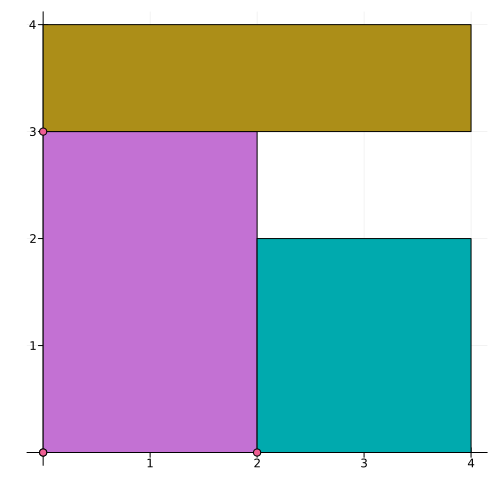

In [1015]:
retangulos = C[:,1:2].*value.(δ)
posicoes = [value.(x) value.(y)]
plot([0 4],[4 4], legend=false, aspect_ratio=1, size=(500,500), ticks=0:4)
for n = 1:size(retangulos)[1]
    plot!(Shape(posicoes[n,1] .+ [0, retangulos[n,1], retangulos[n,1], 0], posicoes[n,2] .+[0, 0, retangulos[n,2], retangulos[n,2]]))
end
scatter!(value.(x),value.(y), legend=false, framestyle= :origin, aspect_ratio=1)

In [1016]:
empty!(model)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: HiGHS